# [NYPD Arrest Data (Year to Date)](https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc)

This project dataset contains information about crimes in **NYC** between `2023-01-01` and `2023-06-30`

* This is a breakdown of every arrest effected in **NYC** by the **NYPD** during the current year.
* This data is manually extracted every quarter and reviewed by the **Office of Management Analysis and Planning**.
* Each record represents an arrest effected in **NYC** by the **NYPD** and includes information about the type of crime, the location and time of enforcement.
* In addition, information related to suspect demographics is also included.

### This data can be used by the public to explore the nature of police enforcement activity.

Data Last Updated
*July 14, 2023*

Metadata Last Updated
*July 14, 2023*

**[Data Footnotes link](NYPD_Arrest_Incident_Level_Data_Footnotes.pdf)** or open `NYPD_Arrest_Incident_Level_Data_Footnotes.pdf` file

## Questions to be explored
* Question **1**: Which age group and gender has the most number of crimes?
* Question **2**: What are the laws that are broken in most cases?
* Question **3**: What are the most frequent crimes by borough?
* Question **4**: What are the general trends in the reported crimes between `2023-01-01` and `2023-06-30` monthly?
* Question **5**: On what days and months are a higher number of crimes reported and by who?

## Analysis steps

1. **Step 1:** Install + Import Necessary Libraries
2. **Step 2:** Reading + Exploring Data
3. **Step 3:** Data Cleaning + Preprocessing
4. **Step 4:** Data Analysis + Visualization
5. **NYPD Arrest Data Final Results**

## 1. Install + Import neccesary libraries

In [179]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install scipy
# !pip install nbformat

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
%matplotlib inline

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Reading + Exploring Data

In [5]:
data = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')

data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261249590,01/02/2023,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,6,0,25-44,M,BLACK,982745,206647,40.733876,-74.005428,POINT (-74.005428 40.733876)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996)
2,262235280,01/20/2023,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,62,0,45-64,M,WHITE,983289,158770,40.602464,-74.003460,POINT (-74.00346 40.602464)
3,264404265,03/01/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,120,0,<18,F,BLACK,958743,173302,40.642316,-74.091908,POINT (-74.091908 40.642316)
4,264443630,03/02/2023,808.0,TAX LAW,125.0,OTHER STATE LAWS (NON PENAL LA,TAX181400A,F,K,83,0,25-44,F,WHITE,1006097,195371,40.702901,-73.921203,POINT (-73.921203 40.702901)


In [6]:
data.shape

(112571, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112571 entries, 0 to 112570
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                112571 non-null  int64  
 1   ARREST_DATE               112571 non-null  object 
 2   PD_CD                     112110 non-null  float64
 3   PD_DESC                   112571 non-null  object 
 4   KY_CD                     112105 non-null  float64
 5   OFNS_DESC                 112571 non-null  object 
 6   LAW_CODE                  112571 non-null  object 
 7   LAW_CAT_CD                111725 non-null  object 
 8   ARREST_BORO               112571 non-null  object 
 9   ARREST_PRECINCT           112571 non-null  int64  
 10  JURISDICTION_CODE         112571 non-null  int64  
 11  AGE_GROUP                 112571 non-null  object 
 12  PERP_SEX                  112571 non-null  object 
 13  PERP_RACE                 112571 non-null  o

## 3. Data Cleaning + Preprocessing

In [8]:
data.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

### 3.1 Column names to lower case

In [9]:
data.columns = [col.lower() for col in data.columns]

### 3.2 Checking for null values

In [10]:
data.isna().sum()

arrest_key                    0
arrest_date                   0
pd_cd                       461
pd_desc                       0
ky_cd                       466
ofns_desc                     0
law_code                      0
law_cat_cd                  846
arrest_boro                   0
arrest_precinct               0
jurisdiction_code             0
age_group                     0
perp_sex                      0
perp_race                     0
x_coord_cd                    0
y_coord_cd                    0
latitude                      0
longitude                     0
new georeferenced column      0
dtype: int64

In [11]:
100 - len(data.dropna())/len(data)*100

1.165486670634536

In [12]:
data[data['pd_cd'].isna()].head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,new georeferenced column
7,266141086,04/04/2023,NaN,(null),NaN,(null),PL 215401B,F,S,120,0,25-44,M,BLACK,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996)
20,264241054,02/26/2023,NaN,(null),NaN,(null),PL 2410200,M,M,30,0,25-44,M,BLACK HISPANIC,1000365,240994,40.828135,-73.941769,POINT (-73.941769 40.828135)
25,265639259,03/25/2023,NaN,(null),NaN,(null),CPL5700600,9,Q,102,0,45-64,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
30,267009678,04/20/2023,NaN,(null),NaN,(null),CPL5700600,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
38,261754494,01/12/2023,NaN,(null),NaN,(null),CPL5700600,9,Q,109,0,25-44,M,BLACK,1032084,216954,40.762037,-73.827328,POINT (-73.827328 40.762037)


In [13]:
data[data['law_cat_cd'].isna()].head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,new georeferenced column
351,267292714,04/26/2023,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,K,84,0,25-44,M,WHITE HISPANIC,987041,193534,40.697883,-73.989934,POINT (-73.989934 40.697883)
689,264675475,03/07/2023,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,B,49,0,18-24,M,BLACK HISPANIC,1028978,246342,40.842714,-73.838342,POINT (-73.838342 40.842714)
931,261717586,01/11/2023,16.0,FUGITIVE/OTHER STATES,995.0,FOR OTHER AUTHORITIES,FOA9000016,NaN,K,84,0,25-44,M,UNKNOWN,988897,192631,40.695404,-73.983239,POINT (-73.983239 40.695404)
1019,261285670,01/03/2023,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,B,49,0,25-44,M,BLACK,1028978,246342,40.842714,-73.838342,POINT (-73.838342 40.842714)
1032,261368278,01/04/2023,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,M,25,0,25-44,M,BLACK,1001738,233162,40.806635,-73.936826,POINT (-73.936826 40.806635)


In [14]:
# data[data['law_code'] == 'FOA9000049']['law_cat_cd'].value_counts()
# data[data['ofns_desc'] == 'FOR OTHER AUTHORITIES']['law_cat_cd'].value_counts()

**As a result**

Just `1.17 %` of data is missing. This data **cannot be restored**. It means the only possible way - is to **remove this missing data.**

In [15]:
data = data.dropna()

### 3.3 Converting datatypes to required format

In [16]:
pd.DataFrame(data.dtypes,columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
arrest_key,int64
arrest_date,object
pd_cd,float64
pd_desc,object
ky_cd,float64
ofns_desc,object
law_code,object
law_cat_cd,object
arrest_boro,object


In [18]:
data['arrest_date'] = pd.to_datetime(data['arrest_date'], format='%m/%d/%Y')

In [19]:
data['ky_cd'] = data['ky_cd'].apply(lambda x: str(int(x)))
data['pd_cd'] = data['pd_cd'].apply(lambda x: str(int(x)))

In [20]:
def extract_law_code(x):
    """Function to get first letters of code ( Penal Law, VTL and other various local laws) and numerical code
    Args:
        x: str | LAW_CODE
    
    Returns:
        fl, numcode: List() | fl - represents first letters | numcode - represents numerical code
    """
    fl = ''
    for i in range(len(x)):
        if x[i].isalpha():
            fl += x[i]
        else:
            numcode = x[i:].strip()
            return [fl, numcode]

law_code_splitted = np.array(data['law_code'].apply(extract_law_code).to_list())

data['law_code_lt'] = law_code_splitted[:,0]
data['law_code_cd'] = law_code_splitted[:,1]

In [21]:
pd.set_option('display.max_columns',25)

**law_cat_cd:** felony, misdemeanor, violation

In [22]:
data['law_cat_cd'].unique()

array(['M', 'F', 'I', 'V', '9'], dtype=object)

In [23]:
data['law_cat_cd'].value_counts()

law_cat_cd
M    62192
F    48315
V      624
I      127
9        1
Name: count, dtype: int64

**Probably** `9` is a mistyping value and it's single, so let's consider it as `Misdemeanor`. There is no information about `I` in [pdf file](NYPD_Arrest_Incident_Level_Data_Footnotes.pdf), but I found some information on [research](https://ypdcrime.com/penal.law/offense_level.php), so let's condier it as `Infraction` or `Traffic Infraction`.

In [24]:
data['law_cat_cd'] = data['law_cat_cd'].map({'F':'Felony','M':'Misdemeanor','V':'Violation', 'I': 'Infraction', '9':'Misdemeanor'})

**arrest_boro:** B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)

In [25]:
data['arrest_boro'].unique()

array(['M', 'S', 'K', 'Q', 'B'], dtype=object)

In [26]:
data['arrest_boro'].value_counts()

arrest_boro
K    30962
B    26529
M    25425
Q    23466
S     4877
Name: count, dtype: int64

In [27]:
data['arrest_boro'] = data['arrest_boro'].map({'B':'Bronx','S':'Staten Island','K':'Brooklyn','M':'Manhattan','Q':'Queens'})

**perp_sex:** M - Male, F - Female, U - Unisex

In [28]:
data['perp_sex'].unique()

array(['M', 'F', 'U'], dtype=object)

In [29]:
data['perp_sex'].value_counts()

perp_sex
M    89438
F    18840
U     2981
Name: count, dtype: int64

In [30]:
data['perp_sex'] = data['perp_sex'].map({'M':'Male','F':'Female','U':'Unisex'})

**law_code_lt**

There is no information in [pdf file](NYPD_Arrest_Incident_Level_Data_Footnotes.pdf), but I made a research and found all the needed corresponding descriptions.

In [31]:
data['law_code_lt'].unique()

array(['PL', 'TAX', 'VTL', 'ABC', 'LOC', 'AC', 'RR', 'COR', 'AM', 'TWN',
       'PHL', 'PRL', 'GCI', 'GB', 'ACA', 'ED'], dtype=object)

In [32]:
data['law_code_lt'].value_counts()

law_code_lt
PL     100572
VTL      9750
LOC       387
TAX       105
COR       104
ABC        97
AC         93
RR         71
AM         53
PHL        10
GCI        10
PRL         3
TWN         1
GB          1
ACA         1
ED          1
Name: count, dtype: int64

In [33]:
law_codes = {
    'PL': 'Penal Law',
    'PHL': 'Public Health Law',
    'VTL': 'Vehicle and Traffic Law',
    'LOC': 'Local Laws',
    'AM': 'Alcoholic Beverage Control Law',
    'TAX': 'Tax Law',
    'RR': 'Real Property Tax Law',
    'AC': 'Agriculture and Markets Law',
    'ABC': 'Alcoholic Beverage Control Law',
    'COR': 'Correction Law',
    'GCI': 'General City Law',
    'TWN': 'Town Law',
    'PRL': 'Public Authorities Law',
    'GB': 'General Business Law',
    'ED': 'Education Law',
    'ACA': 'Agriculture and Markets Law'
}

data['law_code_lt'] = data['law_code_lt'].map(law_codes)

## 4. Data Analysis + Visualization

**Note:** If you have problems with color differences, you can change the palette colors to ones you are more comfortable with. In this project, I'm using **'rocket'** palette.

In [148]:
PALETTE_FOR_CHARTS = 'rocket'

In [34]:
data.sort_values(by='arrest_date', inplace=True)

In [35]:
data.describe(include='all')

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,new georeferenced column,law_code_lt,law_code_cd
count,1.112590e+05,111259,111259,111259,111259,111259,111259,111259,111259,111259.000000,111259.000000,111259,111259,111259,1.112590e+05,111259.000000,111259.000000,111259.000000,111259,111259,111259
unique,NaN,NaN,234,225,65,61,898,4,5,NaN,NaN,5,3,7,NaN,NaN,NaN,NaN,26858,14,889
top,NaN,NaN,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1552500,Misdemeanor,Brooklyn,NaN,NaN,25-44,Male,BLACK,NaN,NaN,NaN,NaN,POINT (-73.881509 40.671404),Penal Law,1552500
freq,NaN,NaN,12104,12104,16619,16619,12027,62193,30962,NaN,NaN,64044,89438,53617,NaN,NaN,NaN,NaN,764,100572,12027
mean,2.660431e+08,2023-04-02 05:16:55.004628736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.553223,0.949370,NaN,NaN,NaN,1.005849e+06,208392.438032,40.738253,-73.921335,NaN,NaN,NaN
min,2.611809e+08,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,-74.251844,NaN,NaN,NaN
25%,2.636690e+08,2023-02-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,0.000000,NaN,NaN,NaN,9.916260e+05,185938.000000,40.676962,-73.973423,NaN,NaN,NaN
50%,2.661448e+08,2023-04-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,0.000000,NaN,NaN,NaN,1.005665e+06,206800.000000,40.734200,-73.922707,NaN,NaN,NaN
75%,2.684548e+08,2023-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.000000,NaN,NaN,NaN,1.017660e+06,236537.000000,40.815904,-73.879351,NaN,NaN,NaN
max,2.706613e+08,2023-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.000000,97.000000,NaN,NaN,NaN,1.066940e+06,271819.000000,40.912714,0.000000,NaN,NaN,NaN


### Question 1: Which age group and gender has the most number of crimes?

In [36]:
data['age_group'].value_counts()

age_group
25-44    64044
45-64    21781
18-24    19448
<18       4241
65+       1745
Name: count, dtype: int64

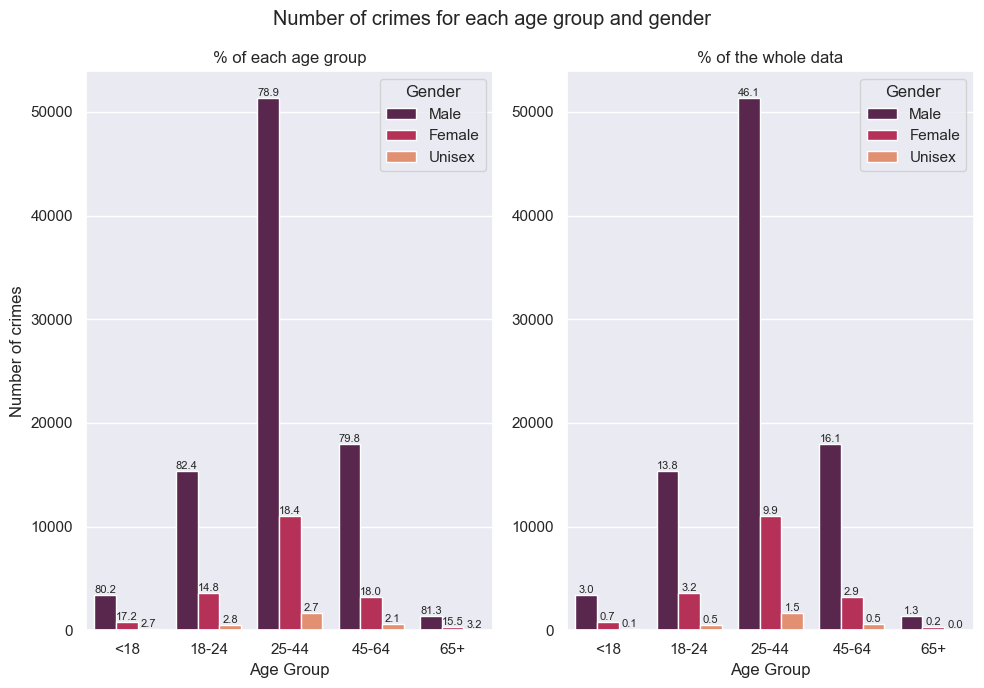

In [149]:
sns.set()

class_order = ['<18', '18-24', '25-44', '45-64', '65+']
age_group_count = data[['age_group','perp_sex']].copy()

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
hue_type = data['perp_sex'].dtype.type
groups = data['age_group'].unique()
proportions = data.groupby('age_group')['perp_sex'].value_counts(normalize=True)

ax = sns.countplot(data=age_group_count,x='age_group', hue='perp_sex', palette=PALETTE_FOR_CHARTS, order=class_order)

for c in ax.containers:
    # c = [(x.xy[0]+0.01, x.xy[1]) for x in c]
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]*100:.1f}' for g in groups]

    ax.bar_label(c, labels, label_type='edge', fontsize=8)

plt.title('% of each age group')
plt.xlabel('Age Group')
plt.ylabel('Number of crimes')
plt.legend(title='Gender')

# --------------------------------------------------------------------

plt.subplot(1,2,2)

ax = sns.countplot(data=age_group_count,x='age_group', hue='perp_sex', palette=PALETTE_FOR_CHARTS, order=class_order)

for c in ax.containers:
    labels = [f'{h/data.perp_sex.count()*100:0.1f}' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)

plt.title('% of the whole data')
plt.xlabel('Age Group')
plt.ylabel('')
plt.legend(title='Gender')


plt.suptitle('Number of crimes for each age group and gender')
plt.tight_layout()
plt.show()

#### Analysis shows that age group and gender that has the most number of crimes is:
* Age Group : 25-44
* Gender : Male

All the other groups are too far from this one.

Depending only on age group, the top looks like this:
1. `25-44` with `64044` crimes
2. `45-64` with `21781` crimes
3. `18-24` with `19448` crimes
4. `<18` with `4241` crimes
5. `65+` with `1745` crimes

### Question 2: What are the laws that are broken in most cases?

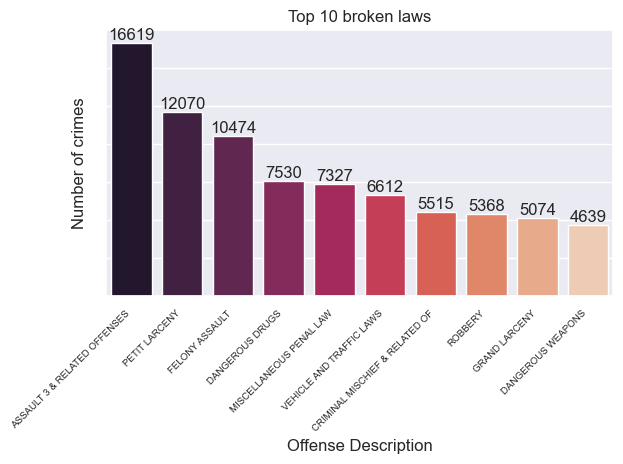

In [150]:
class_order = data['ofns_desc'].value_counts().index[:10]

top_10_broken_laws = data[data['ofns_desc'].isin(class_order)].copy()

plt.figure()
ax = sns.countplot(data=top_10_broken_laws, x='ofns_desc', palette=PALETTE_FOR_CHARTS, order=class_order)

for c in ax.containers:
    ax.bar_label(c)

ax.set(yticklabels=[])
plt.title('Top 10 broken laws')
plt.xticks(rotation=45,fontsize=7, ha='right')
plt.xlabel('Offense Description')
plt.ylabel('Number of crimes')

plt.tight_layout()
plt.show()

#### Analysis shows, that `ASSAULT 3 & RELATED OFFENSES` is the most common crime in this period.
Starting at #3 in this top 10 in descending order we see the really tough crimes (in the most cases).

1. `ASSAULT 3 & RELATED OFFENSES` (total of **16619** crimes)
2. `PETIT LARCENY` (total of **12070** crimes)
3. `FELONY ASSAULT` (total of **10474** crimes)
4. `DANGEROUS DRUGS` (total of **7530** crimes)
5. `MISCELLANEOUS PENAL LAW` (total of **7327** crimes)
6. `VEHICLE AND TRAFFIC LAWS` (total of **6612** crimes)
7. `CRIMINAL MISCHIEF & RELATED OF` (total of **5515** crimes)
8. `ROBBERY` (total of **5368** crimes)
9. `GRAND LARCENY` (total of **5074** crimes)
10. `DANGEROUS WEAPONS` (total of **4639** crimes)


### Question 3: What are the 3 most frequent crimes by borough?

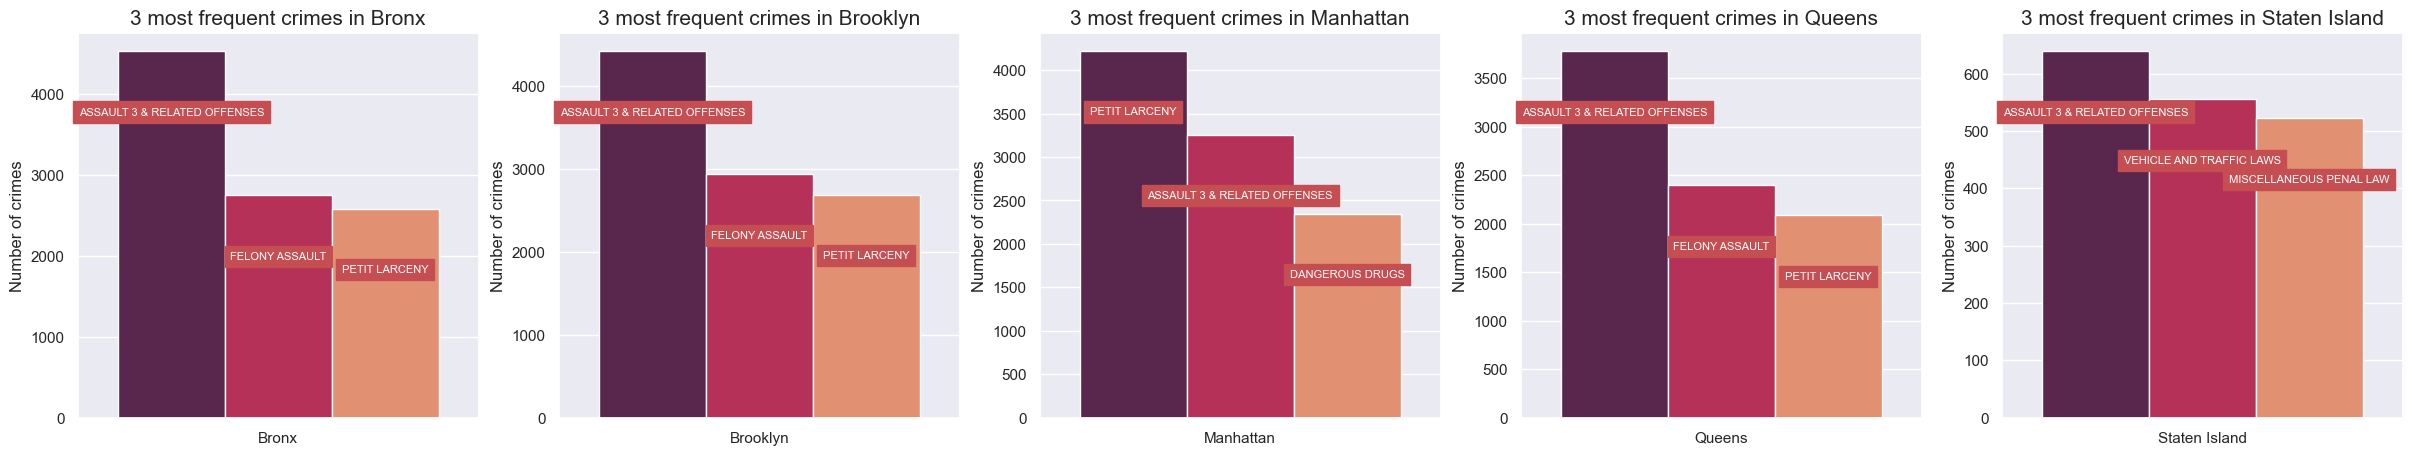

In [151]:
boro_crimes = data[['arrest_boro','ofns_desc', 'arrest_key']].copy()
boro_crimes = boro_crimes.groupby(['arrest_boro','ofns_desc'])['arrest_key'].count().reset_index().sort_values(by='arrest_key', ascending=False)

boro_crimes = boro_crimes.groupby('arrest_boro').head(3).sort_values(by='arrest_boro')

boroughs = boro_crimes['arrest_boro'].unique()

fig, axs = plt.subplots(1, boro_crimes.arrest_boro.nunique(), figsize=(30,5))

for i, ax in enumerate(axs.ravel()):
    temp_data = boro_crimes[boro_crimes['arrest_boro'] == boroughs[i]]
    axx = sns.barplot(data=temp_data, x='arrest_boro', y='arrest_key', hue='ofns_desc', ax=ax, palette=PALETTE_FOR_CHARTS)
    for j, p in enumerate(axx.patches):
        axx.annotate(temp_data['ofns_desc'].to_list()[j], 
                      (p.get_x() + p.get_width() / 2., p.get_height()-temp_data['arrest_key'].max()*0.2), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=8,
                      backgroundcolor='r',
                      color='w')
    ax.set_title(f'3 most frequent crimes in {boroughs[i]}', fontsize=15)
    ax.set_xlabel('')
    ax.set_ylabel('Number of crimes')
    ax.get_legend().remove()
    
    # ax.legend(title='Offence description', fontsize=8)

#### Analysis shows, that

In the most regions, the most frequent crime is `ASSAULT 3 & RELATED OFFENSES`, except **Manhattan**, there is `PETIT LARCENY` at the first place.

If we count violations of these laws as **not very dangerous**, then violations of laws such as: `Felony Assault`, `Dangerous drugs` and `Miscellaneous penal law` are.

It means, that **Bronx**, **Brooklyn** and **Queens** are quite dangerous boroghs, depending only on `Felony Assault`, because it's the second highest crime rate there.

### Question 4: What are the general trends in the reported crimes between `2023-01-01` and `2023-06-30` monthly?

#### 4.1 What are the trends in the level of offense of reported crimes?

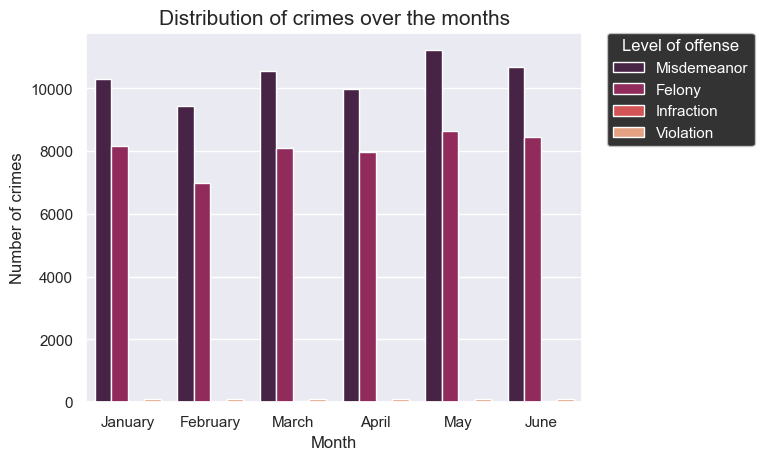

In [152]:
trends_data = data.copy()

trends_data['month'] = trends_data['arrest_date'].dt.month_name()

sns.countplot(data=trends_data, x='month', hue='law_cat_cd', palette=PALETTE_FOR_CHARTS)
plt.title('Distribution of crimes over the months', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Number of crimes')

legend = plt.legend(title='Level of offense', labelcolor = 'white', facecolor = 'black', loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.setp(legend.get_title(), color='white')

#plt.tight_layout()
plt.show()

#### Analysis shows, that

`Misdemeanor` is the most frequent crime all over the months, follows by `Felony`. `Infraction` and `Violation` are the most rare.

#### 4.2 Did crime rates increase or decrease?

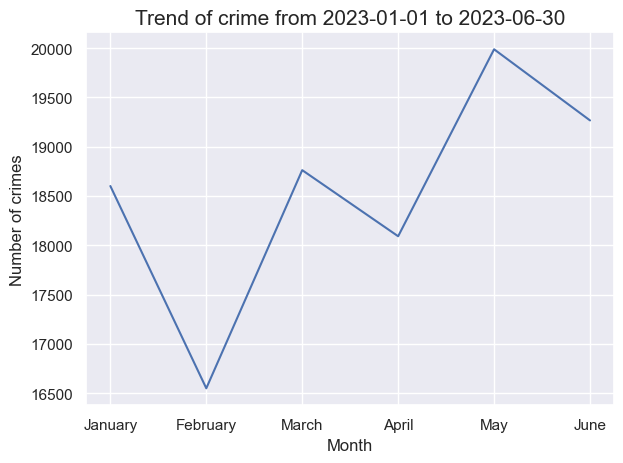

In [153]:
monthly_crimes = trends_data.groupby('month')['arrest_key'].count().reset_index()

month_mapper = {month:i+1 for i, month in enumerate(trends_data.month.unique())}

monthly_crimes['month_number'] = monthly_crimes['month'].map(month_mapper)

sns.lineplot(data=monthly_crimes.sort_values(by='month_number'), x='month', y='arrest_key')

plt.title('Trend of crime from 2023-01-01 to 2023-06-30', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Number of crimes')

plt.tight_layout()
plt.show()

#### Analysis shows, that

Depending on this chart `Trend of crime from 2023-01-01 to 2023-06-30` we can clearly say, that for this period number of crimes increases. The biggest difference is between `January`, `February` and `March`, around **2.000** of crimes.

Trend shows, that from month to month number of crimes decreases and increases, but in general it still rising. 

### Question 5: On what days are a higher number of crimes reported and by who?

In [154]:
trends_data['day'] = trends_data['arrest_date'].dt.strftime('%a')

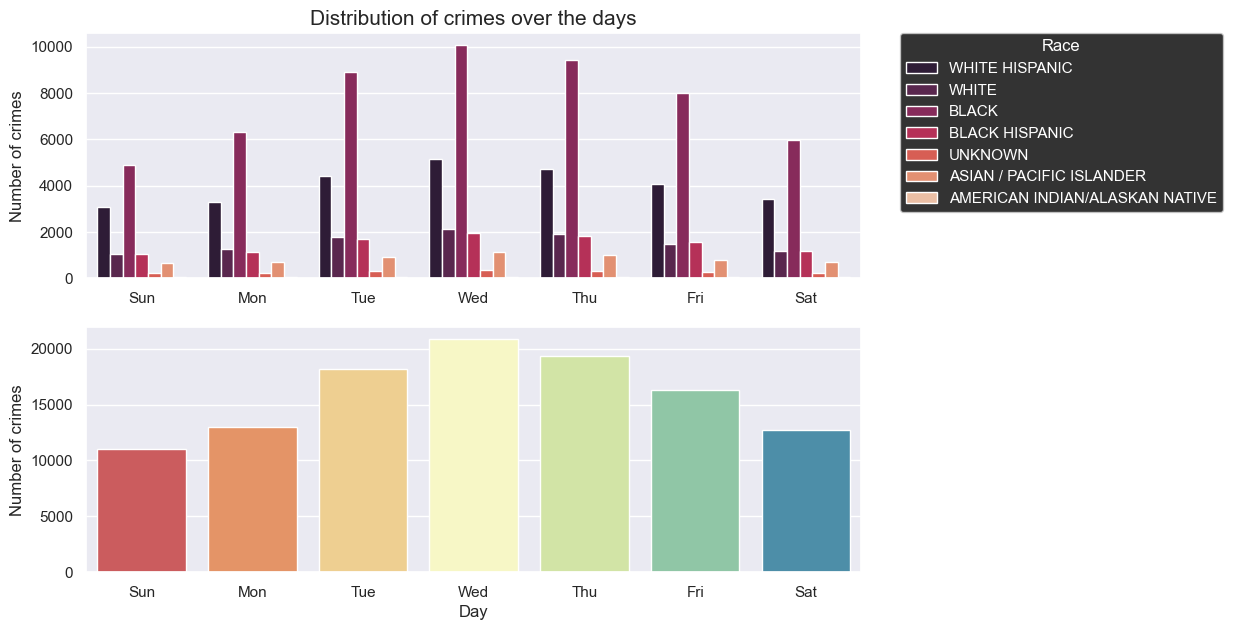

In [172]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)

sns.countplot(data=trends_data, x='day', hue='perp_race', palette=PALETTE_FOR_CHARTS)

plt.title('Distribution of crimes over the days', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of crimes')

legend = plt.legend(title='Race', labelcolor = 'white', facecolor = 'black', loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.setp(legend.get_title(), color='white')

# ----------------------------------------------------------------

plt.subplot(2,1,2)
sns.countplot(data=trends_data, x='day', palette='Spectral')

plt.xlabel('Day')
plt.ylabel('Number of crimes')

plt.show()

#### Analysis shows, that

The most number of crimes was made at `Wednesday`, following by `Thursday` and `Thuesday`. The closer you get to the center of the week, the more crime there is.

Mostly, crimes was made by race: `BLACK`, following by `WHITE HISPANIC`. The least offenders among `ASIAN / PACIFIC ISLANDER` and `AMERICAN INDIAN/ALASKAN NATIVE`.

## NYPD Arrest Data Final Results

1. The top age group of crimes looks like this:
    1. `25-44` with `64044` crimes
    2. `45-64` with `21781` crimes
    3. `18-24` with `19448` crimes
    4. `<18` with `4241` crimes
    5. `65+` with `1745` crimes
2. Top 10 the most common violations:
    1. `ASSAULT 3 & RELATED OFFENSES` (total of **16619** crimes)
    2. `PETIT LARCENY` (total of **12070** crimes)
    3. `FELONY ASSAULT` (total of **10474** crimes)
    4. `DANGEROUS DRUGS` (total of **7530** crimes)
    5. `MISCELLANEOUS PENAL LAW` (total of **7327** crimes)
    6. `VEHICLE AND TRAFFIC LAWS` (total of **6612** crimes)
    7. `CRIMINAL MISCHIEF & RELATED OF` (total of **5515** crimes)
    8. `ROBBERY` (total of **5368** crimes)
    9. `GRAND LARCENY` (total of **5074** crimes)
    10. `DANGEROUS WEAPONS` (total of **4639** crimes)
3. **Bronx**, **Brooklyn** and **Queens** are quite dangerous boroghs, depending only on `Felony Assault`

    In the most regions, the most frequent crime is ASSAULT 3 & RELATED OFFENSES, except Manhattan, there is PETIT LARCENY at the first place.
4. `Misdemeanor` is the most frequent crime all over the months, follows by `Felony`. `Infraction` and `Violation` are the most rare.

    Trend shows, that from month to month number of crimes decreases and increases, but in general it still rising.
5. The most number of crimes was made at `Wednesday`, following by `Thursday` and `Thuesday`.

    Mostly, crimes was made by race: `BLACK`, following by `WHITE HISPANIC`.